#  - MTR 3420 Dynamics - Interactive Lab Notebook - 
##  - Plotting Notebook  - 
###  - Your Name - 
####  - Date - 

## This notebook will allow for several different plots:
<br>
  <li>500mb Geopotential Heights - Color-Filled Contours w/ Contours</li><br>
  <li>500mb u and v Components of Geostrophic Winds</li><br>
  <li>500mb Geostrophic Winds and Heights - 3 differnent times</li><br>
  <li>500mb Aboslute Vorticity and Heights - 3 differnent times</li><br>

![](1000and500mb.png)

<h1>External Libraries and Packages</h1>

In Python we can import external libraries that we can download which will help us in numerous ways

* One of the most useful aspects of Python is being able to import external libraries (once you have them downloaded) to help with such things like mathematical calculations, plotting, working with arrays and specific types of data files (NetCDF for example).<br>


* We can also use them for grabbing things from the internet or the operating system of our computer like command line operations.

<h4>Change directory to where the data dile resides</h4>

In [ ]:
cd /home/username/Downloads/

In [1]:
# numpy is Python's math library and helps us with calculations. Trig functions, constants and 
# symbols are accessable.
import numpy as np

# Matplotlib is Pyhton's plotting library and pyplot is where all our plotting be be coming from
import matplotlib.pyplot as plt

# This can allow us to Gaussian smooth the data if desired
import scipy.ndimage as ndimage

# It wouldn't be a bad idea to save our calulations in a new .nc file so we don't have to run calculations
# everytime we open our notebook.
from netCDF4 import Dataset as NetCDFFile
from netCDF4 import num2date, date2num

# Build our backgroud map and plotting control
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Possibly needed for plot stuff
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import patheffects

from datetime import datetime, timedelta

# Function to create our vorticity color bar
import Color_Bar 

# A very handy function to hide the cells from view so the students couldn't see my work but see the output
import Cell_Hide_Toggle 

# Make sure we don't break anything trying to import our libraries
print("imoprts all good.")

imoprts all good.


# -------------------------------------------//------------------------------------------

# Now it's time to pull some data from our NetCDF file!
    
* What we will be doing time and time again is assigning data, numbers, strings, etc to <i>variables</i>. This allows us to keep accessing the data once the data file is closed. Most importantly it will allow us to be free to probe the information stored in the variable over and over again in our <i>for-loops</i>.


* Setting the file path as a variable <i>ds</i> for the data file. Find out where this file lives on your computer. We can use the command line or through finder windows on the desktop.


* Then calling NetCDFFile() will read all the data from the NetCDF file and we can print it out to examine what's going on.

In [2]:
#new_ds = NetCDFFile('/home/username/Desktop/Groundhogs_Day_Storm_Calcs.nc','r')
new_ds = NetCDFFile('/Users/chowdahead/Desktop/MSU_Dynamics/Groundhogs_Day_Storm_Calcs.nc','r+')

In [3]:
list(new_ds.variables.keys())

['level',
 'latitude',
 'longitude',
 'dates',
 'hgt',
 'corfac',
 'uwinds_130_500',
 'vwinds_130_500',
 'winds_129_500',
 'winds_130_500',
 'winds_131_500',
 'vorticity_129_500',
 'vorticity_130_500',
 'vorticity_131_500']

In [4]:
# Set the time step number like we did in the data notebook
mytime_index = 130

# fill in times.
Times = new_ds.variables["dates"]
dates = [datetime(2016,1,1)+n*timedelta(hours=6) for n in range(Times.shape[0])]
print(len(dates))
mydate = dates[mytime_index]
mydate


1464


datetime.datetime(2016, 2, 2, 12, 0)

### List the pressure levels metadata:

In [5]:
print(new_ds.variables['level'])

<class 'netCDF4._netCDF4.Variable'>
int32 level(level)
unlimited dimensions: 
current shape = (17,)
filling on, default _FillValue of -2147483647 used



### List the pressure levels:

In [6]:
list(new_ds.variables['level'][:])

[1000,
 925,
 850,
 700,
 600,
 500,
 400,
 300,
 250,
 200,
 150,
 100,
 70,
 50,
 30,
 20,
 10]

### We are going to grab all the values for each variable and assign them to a new arrays: 
* Lat 
* Lon
* Time
* Level

In [7]:
Lat = new_ds.variables['latitude'][:] # The .values command is fetching just the numerical data
Lon = new_ds.variables['longitude'][:]
Time = new_ds.variables['dates'][:]
Level = new_ds.variables['level'][:]
Hgt = new_ds.variables['hgt'][:,:,:,:]

print("Data type of our new arrays: ",type(Lon))
print("Shape of Lat array: ",Lat.shape[0])
print("Shape of Lon array: ",Lon.shape[0])
print("Shape of Time array: ",Time.shape[0])
print("Shape of Level array: ",Level.shape[0])
print("Number of dimensions for Level array: "+str(len(Level.shape))+"; meaning 1 dimension of length 17")

print("Shape of Height array: ",Hgt.shape)

Data type of our new arrays:  <class 'numpy.ma.core.MaskedArray'>
Shape of Lat array:  73
Shape of Lon array:  144
Shape of Time array:  1464
Shape of Level array:  17
Number of dimensions for Level array: 1; meaning 1 dimension of length 17
Shape of Height array:  (1464, 17, 73, 144)


### Let's pull some of the geopotential heights:

#### Now we can populate a 4d array of time, level, lat, and lon. Each entry in the new 4d array will have a height value in meters:

* Give this a minute as it is doing some heavy lifting populating all the indicies

In [8]:
hgt129_Surf=Hgt[mytime_index-1,0,:,:]
hgt129_500mb=Hgt[mytime_index-1,5,:,:]

hgt130_Surf=Hgt[mytime_index,0,:,:]
hgt130_500mb=Hgt[mytime_index,5,:,:]

hgt131_Surf=Hgt[mytime_index+1,0,:,:]
hgt131_500mb=Hgt[mytime_index+1,5,:,:]

# Set the countour levels for both heights
hgt129_Surf_levels = np.arange(-20,400,40) 
hgt129_500mb_levels = np.arange(hgt129_500mb.min(),hgt129_500mb.max()+53,60)

hgt130_Surf_levels = np.arange(-20,400,40) 
hgt130_500mb_levels = np.arange(hgt130_500mb.min(),hgt130_500mb.max()+53,60) 

hgt131_Surf_levels = np.arange(-20,400,40) 
hgt131_500mb_levels = np.arange(hgt131_500mb.min(),hgt131_500mb.max()+53,60)


In [9]:
#CONUS_height
CONUS_height = new_ds.variables['hgt'][:,:,12:32,88:122]

hgt129_Surf=CONUS_height[mytime_index-1,0,:,:]
hgt129_500mb=CONUS_height[mytime_index-1,5,:,:]

hgt130_Surf=CONUS_height[mytime_index,0,:,:]
hgt130_500mb=CONUS_height[mytime_index,5,:,:]

hgt131_Surf=CONUS_height[mytime_index+1,0,:,:]
hgt131_500mb=CONUS_height[mytime_index+1,5,:,:]

# Set the countour levels for both heights
hgt129_Surf_levels = np.arange(-20,400,40) 
hgt129_500mb_levels = np.arange(hgt129_500mb.min(),hgt129_500mb.max()+53,60)

hgt130_Surf_levels = np.arange(-20,400,40) 
hgt130_500mb_levels = np.arange(hgt130_500mb.min(),hgt130_500mb.max()+53,60) 

hgt131_Surf_levels = np.arange(-20,400,40) 
hgt131_500mb_levels = np.arange(hgt131_500mb.min(),hgt131_500mb.max()+53,60)


### If you want to smooth the data with a Gaussian filter:

In [10]:
# Smoothed Data
# Gaussian Filter to smooth the data and make it a little neater 
#hgt129_500mb_smooth = ndimage.gaussian_filter(hgt129_500mb, sigma=1, order=0)
#hgt129_Surf_smooth = ndimage.gaussian_filter(hgt129_Surf, sigma=1, order=0)

#hgt130_500mb_smooth = ndimage.gaussian_filter(hgt130_500mb, sigma=1, order=0)
#hgt130_Surf_smooth = ndimage.gaussian_filter(hgt130_Surf, sigma=1, order=0)

#hgt131_500mb_smooth = ndimage.gaussian_filter(hgt131_500mb, sigma=1, order=0)
#hgt131_Surf_smooth = ndimage.gaussian_filter(hgt131_Surf, sigma=1, order=0)


# Smoothed Levels
#hgt129_Surf_levels_smooth = np.arange(0,400,40) 
#hgt129_500mb_levels_smooth = np.arange(hgt129_500mb_smooth.min(),hgt129_500mb_smooth.max(),60)

#hgt130_Surf_levels_smooth = np.arange(0,400,40) 
#hgt130_500mb_levels_smooth = np.arange(hgt130_500mb_smooth.min(),hgt130_500mb_smooth.max(),60)

#hgt131_Surf_levels_smooth = np.arange(0,400,40) 
#hgt131_500mb_levels_smooth = np.arange(hgt131_500mb_smooth.min(),hgt131_500mb_smooth.max(),60) 

### Pull the winds data and assign it to variables:

In [10]:
uWinds_130_500mb = new_ds.variables['uwinds_130_500'][:]
vWinds_130_500mb = new_ds.variables['vwinds_130_500'][:]
Winds_130_500mb = new_ds.variables['winds_130_500'][:]
Winds_129_500mb = new_ds.variables['winds_129_500'][:]
Winds_131_500mb = new_ds.variables['winds_131_500'][:]

### Pull the vorticity data and assign it to variables too:

In [11]:
Vort_129_500mb = new_ds.variables['vorticity_129_500'][:]
Vort_130_500mb = new_ds.variables['vorticity_130_500'][:]
Vort_131_500mb = new_ds.variables['vorticity_131_500'][:]


## Since we've loaded all our data we can close the file so it's not running in the background

In [12]:
new_ds.close()

# -------------------------------------------//------------------------------------------


# Let's play with the CartoPy Mapping Library

In [13]:
# Set pur lat/lon box for plotting 
#extent = [-125,-70,20,50]
extent = [-125,-70,25,48]

# Set projection of data
datacrs = ccrs.PlateCarree()

# Set projection of map
plotcrs = ccrs.LambertConformal()

# Add Map Features
country_borders = cfeature.NaturalEarthFeature(category='cultural',
    name='admin_0_countries',scale='50m', facecolor='none')

state_boundaries = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

## Plot the CONUS map

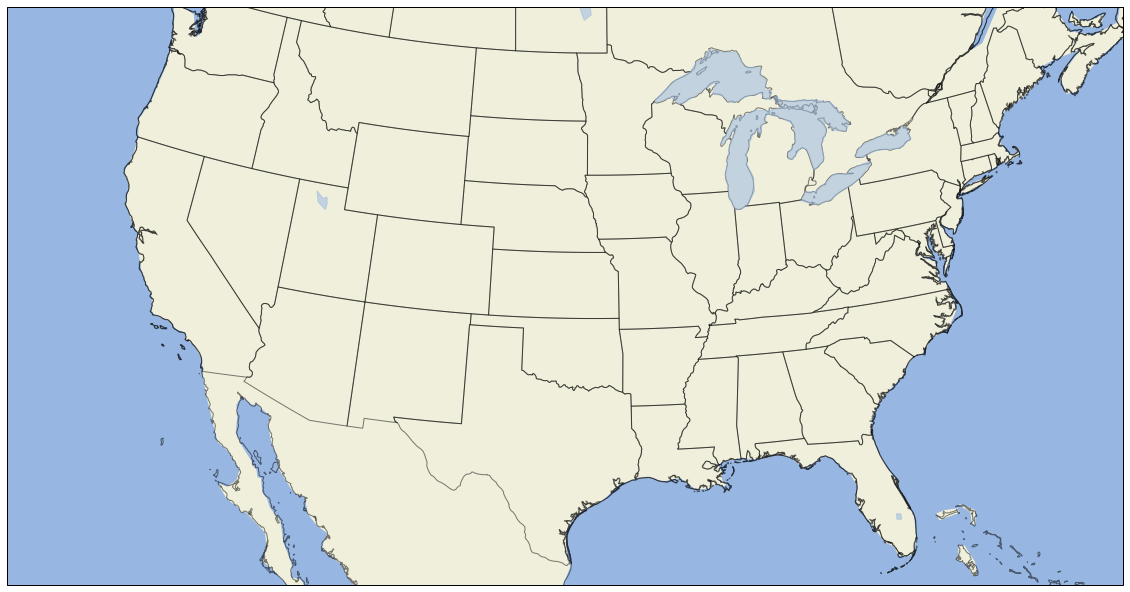

In [14]:
# Draw a new figure
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# draw coastlines, state and country boundaries, edge of map.
ax.coastlines('10m', color='black',alpha=0.5)
ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
ax.add_feature(cfeature.LAKES,alpha=0.5)

# plot only the CONUS from the lat/lon extent
ax.set_extent(extent, datacrs)

plt.show()

## Now we can plot Denver's location with a star

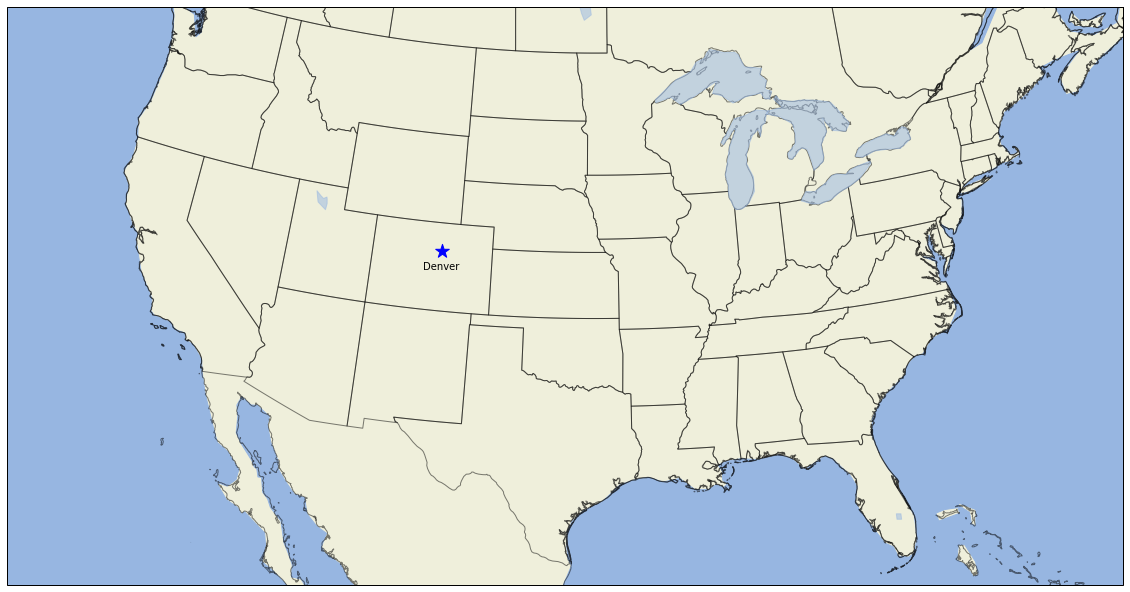

In [15]:
# Draw a new figure
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
    # draw coastlines, state and country boundaries, edge of map.
ax.coastlines('10m', color='black',alpha=0.5)
ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
ax.add_feature(cfeature.LAKES,alpha=0.5)
ax.set_extent(extent, datacrs)

# Labeling Denver with a star
ax.scatter(-104.9903, 39.7392, marker='*', c="blue",transform=datacrs,s=205)
transform = datacrs._as_mpl_transform(ax)
ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform)

#ax.gridlines(color="black", linestyle="dotted", draw_labels=True)

plt.show()
Cell_Hide_Toggle.hide_toggle()

## Plot the 500mb Heights

In [37]:
hgt130_Surf.shape,hgt130_500mb.shape

((20, 34), (20, 34))

In [50]:
def HeightMap(day_index,HGT,HGT_1000=None):
    '''
    Welcome to the Pressure Height plotting function!
    
    The keyword arguments that need to pass to the function below are:
    
    * day_index: Numerical index between 0 and 1463 (1464 entries in the Times array) 
        - Remember what day number March 2nd 2016 was in the Jupyter Data Notebook you did earlier?
        
    * HGT: Pressure height data is from the Heights array
    
    * HGT_1000 (optional): 1000mb Surface Pressure
    
    
    '''
    
    #----------------------------------------------------------------#
    # Draw a new figure
    #----------------------------------------------------------------#
    fig=plt.figure(figsize=(20,20))
    
    #----------------------------------------------------------------#
    # Set up the axes
    #----------------------------------------------------------------#
    ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
    
    #----------------------------------------------------------------#
    # draw coastlines, state and country boundaries, edge of map
    #----------------------------------------------------------------#
    ax.coastlines('10m', color='black',alpha=0.5)
    ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
    ax.add_feature(cfeature.LAKES,alpha=0.5)
    ax.set_extent(extent, datacrs)
    
    if HGT_1000.any() == None:
        #----------------------------------------------------------------#
        # Plot the height levels based off the heights data
        #----------------------------------------------------------------#
        HGT_levels = np.arange(HGT.min(),HGT.max()+53,60)

        #----------------------------------------------------------------#
        # Plot the Heights contours
        #----------------------------------------------------------------#
        hgt_contour = ax.contour(Lon[88:122], Lat[12:32], HGT,HGT_levels,
                    colors='k',transform=datacrs)

        hgt_contourfill=ax.contourf(Lon[88:122],Lat[12:32],HGT,HGT_levels, 
                        cmap=plt.cm.jet,transform=datacrs,alpha=0.6)

        #----------------------------------------------------------------#
        # Labeling the contours
        #----------------------------------------------------------------#
        ax.clabel(hgt_contour, inline=True, fmt='%1i',fontsize=20,colors='k')

        #----------------------------------------------------------------#
        # Let's set the colorbar and position
        #----------------------------------------------------------------#
        cb = plt.colorbar(hgt_contourfill,pad=0.02, shrink=0.45) # cax = cbaxes
        cb.ax.tick_params(labelsize=15)
        cb.ax.set_title('$m$', fontsize=15,horizontalalignment='center',y=1.01,x=.5)

    #----------------------------------------------------------------#
    # Optional Surface Pressure contours
    #----------------------------------------------------------------#
    if HGT_1000.any() != None:
        HGT_levels = np.arange(HGT.min(),HGT.max()+53,60)
        hgt_contour = ax.contour(Lon[88:122], Lat[12:32], HGT_1000,hgt130_Surf_levels,
                    colors='k',transform=datacrs)

        hgt_contourfill=ax.contourf(Lon[88:122],Lat[12:32],HGT,HGT_levels, 
                        cmap=plt.cm.jet,transform=datacrs,alpha=0.6)
        cb = plt.colorbar(hgt_contourfill,pad=0.02, shrink=0.45) # cax = cbaxes
        ax.clabel(hgt_contour, inline=True, fmt='%1i',fontsize=20)
        cb.ax.tick_params(labelsize=15)
        cb.ax.set_title('$m$', fontsize=15,horizontalalignment='center',y=1.01,x=.5)
    
    #----------------------------------------------------------------#
    # Labeling Denver with a star
    #----------------------------------------------------------------#
    ax.scatter(-104.9903, 39.7392, marker='*', c="k",transform=datacrs,s=205)
    transform = datacrs._as_mpl_transform(ax)
    ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform,color="k")

    #----------------------------------------------------------------#
    # Label plot title
    #----------------------------------------------------------------#
    plt.title('500mb Geopotential Heights',fontsize=30)
    
    #----------------------------------------------------------------#
    # Place timestamp in lower right corner of plot
    #----------------------------------------------------------------#
    text_time = ax.text(.995, 0.01, 
            str(dates[day_index])[:-3]+"Z",
            horizontalalignment='right', transform=ax.transAxes,
            color='white', fontsize=20, weight='bold')

    outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
    text_time.set_path_effects(outline_effect)

    #----------------------------------------------------------------#
    # Save the figure
    #----------------------------------------------------------------#
    file_date = str(dates[day_index])[:-3].replace(" ","_")
    file_date = file_date.replace("-","_")
    file_date = file_date.replace(":","")
    file_date = file_date+"Z"
    print(file_date)
        
    #----------------------------------------------------------------#
    # Save the figure
    #----------------------------------------------------------------#
    #plt.savefig("/home/username/Desktop/500mb_Height_Contour_"+file_date+".png",bbox_inches='tight')
    #plt.savefig("/Users/chowdahead/Desktop/MSU_Dynamics/500mb_Height_Contour_"+file_date+".png",bbox_inches='tight')
    
    #----------------------------------------------------------------#
    # Finally, show the plot
    #----------------------------------------------------------------#
    plt.show()
print("HeightMap(day_index,HGT):")

HeightMap(day_index,HGT):


In [32]:
HeightMap?

<h2>Now that we have defined the function call it with varibales that make sense!</h2>

* hint: Remember, looking at the docstrings either by looking at the code (in above code block) or by running <i>HeightMap?</i> in a cell will show what variables you should include in when calling the function

2016_02_02_1200Z


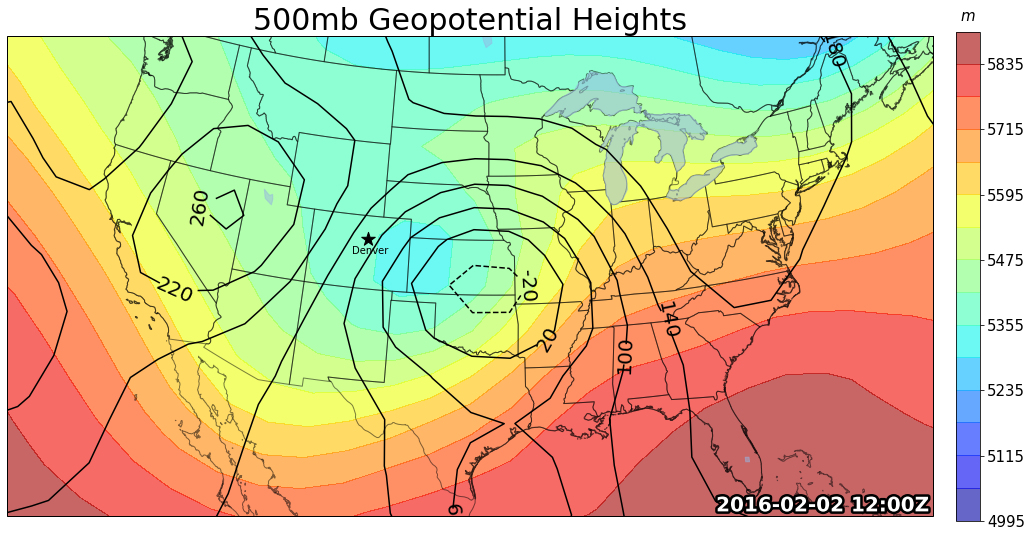

In [51]:
HeightMap(130,hgt130_500mb,hgt130_Surf)

# Geostrophic Winds

## Let's plot the u-component of the Winds

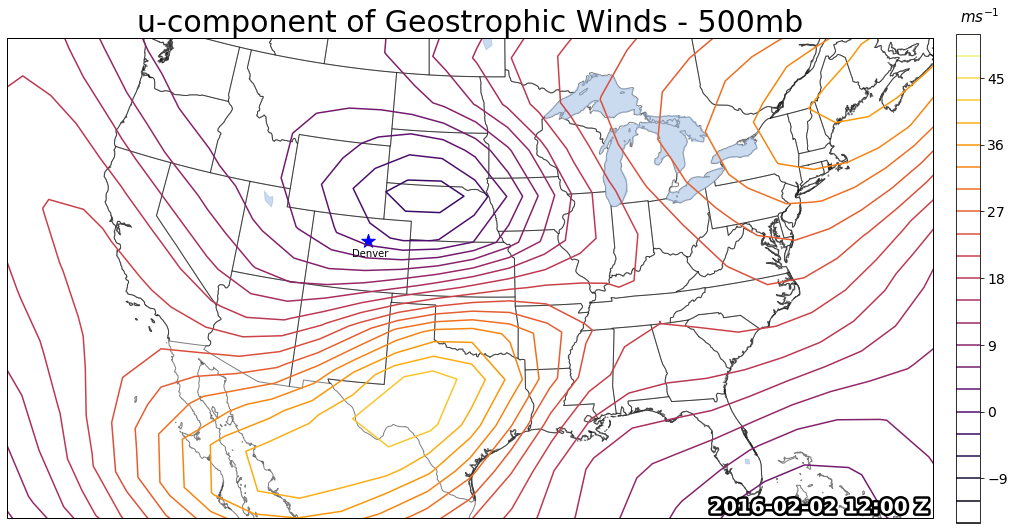

hit toggle to see the code


In [18]:
# Draw a new figure
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)

# draw coastlines, state and country boundaries, edge of map.
ax.coastlines('10m', color='black',alpha=0.5)
ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
ax.add_feature(cfeature.LAKES,alpha=0.5)
ax.set_extent(extent, datacrs)

# We can set the limits for the contours by taking the max and min
wind_levels = np.arange(int(uWinds_130_500mb[12:32,88:122].min()),
        int(uWinds_130_500mb[12:32,88:122].max()),3)

# Gaussian Filter to smooth the data and make it a little neater 
wind_smooth = ndimage.gaussian_filter(uWinds_130_500mb[12:32,88:122], sigma=1, order=0)

# Plotting of the data here
wind_contour = ax.contour(Lon[88:122], Lat[12:32],wind_smooth,levels=wind_levels,
        cmap=plt.cm.inferno,transform=datacrs)

# Let's set the colorbar and position
cb = plt.colorbar(wind_contour,alpha=0.4,orientation="vertical", pad=0.02,shrink=0.45)

cb.ax.tick_params(labelsize=14)
cb.ax.set_title('$ms^{-1}$', fontsize=15,horizontalalignment='center',y=1.01,x=1)

# Labeling the contours
#ax.clabel(wind_smooth.item, inline=True, fmt='%1i',fontsize=20,colors='k')

# Labeling Denver with a star
transform = datacrs._as_mpl_transform(ax)
ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform)
ax.scatter(-104.9903, 39.7392, marker='*', c="blue",transform=datacrs,s=205)

# Set the plot title
plt.title('u-component of Geostrophic Winds - 500mb',fontsize=30)

text_time = ax.text(.995, 0.01, 
        str(dates[130])[:-3]+" Z",
        horizontalalignment='right', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold')

outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
text_time.set_path_effects(outline_effect)

# make everything on the plot line up nicely
#plt.tight_layout()

# Save the figure
file_date = str(dates[130])[:-3].replace(" ","_")
file_date = file_date.replace("-","_")
file_date = file_date.replace(":","")
file_date = file_date+"Z"
#plt.savefig("/home/username/Desktop/500mb_uWinds_"+file_date+".png",bbox_inches='tight')

plt.show()
print("hit toggle to see the code")
Cell_Hide_Toggle.hide_toggle()

## Now let's plot the v-component of the Winds

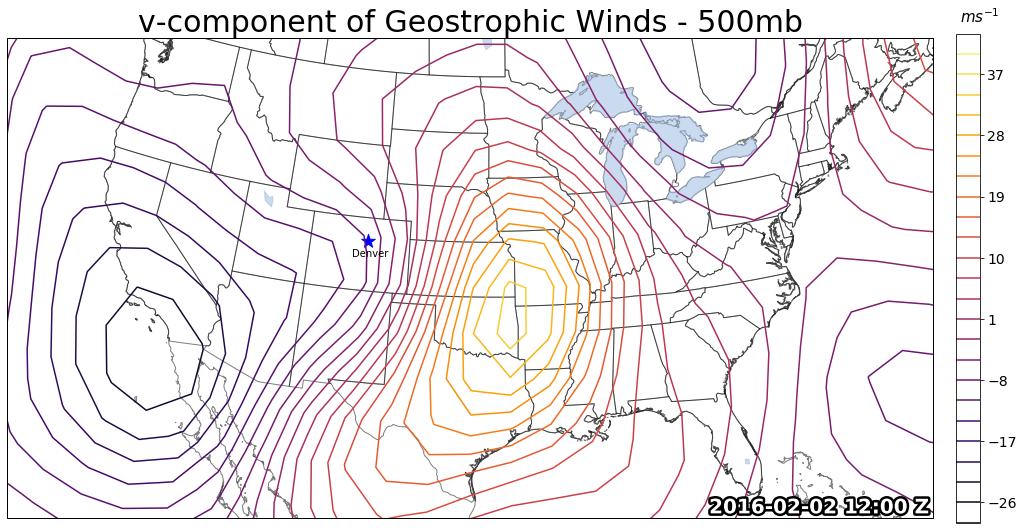

hit toggle to see the code


In [19]:
# Draw a new figure
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)

# draw coastlines, state and country boundaries, edge of map.
ax.coastlines('10m', color='black',alpha=0.5)
ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
ax.add_feature(cfeature.LAKES,alpha=0.5)
ax.set_extent(extent, datacrs)

# We can set the limits for the contours by taking the max and min
wind_levels = np.arange(int(vWinds_130_500mb[12:32,88:122].min()),
            int(vWinds_130_500mb[12:32,88:122].max()),3)

# Gaussian Filter to smooth the data and make it a little neater 
wind_smooth = ndimage.gaussian_filter(vWinds_130_500mb[12:32,88:122], sigma=1, order=0)

# Plotting of the data here
wind_contour = ax.contour(Lon[88:122], Lat[12:32],wind_smooth,levels=wind_levels,
            cmap=plt.cm.inferno,transform=datacrs)

# Let's set the colorbar and position
cb = plt.colorbar(wind_contour,alpha=0.4,orientation="vertical", pad=0.02,shrink=0.45)
cb.ax.tick_params(labelsize=14)
cb.ax.set_title('$ms^{-1}$', fontsize=15,horizontalalignment='center',y=1.01,x=1)

# Labeling the contours
#ax.clabel(wind_smooth.item, inline=True, fmt='%1i',fontsize=20,colors='k')

# Labeling Denver with a star
transform = datacrs._as_mpl_transform(ax)
ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform)
ax.scatter(-104.9903, 39.7392, marker='*', c="blue",transform=datacrs,s=205)

# Set the plot title
plt.title('v-component of Geostrophic Winds - 500mb',fontsize=30)

text_time = ax.text(.995, 0.01, 
        str(dates[130])[:-3]+" Z",
        horizontalalignment='right', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold')

outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
text_time.set_path_effects(outline_effect)

# make everything on the plot line up nicely
#plt.tight_layout()

# Save the figure
file_date = str(dates[130])[:-3].replace(" ","_")
file_date = file_date.replace("-","_")
file_date = file_date.replace(":","")
file_date = file_date+"Z"
#plt.savefig("/home/username/Desktop/500mb_vWinds_"+file_date+".png",bbox_inches='tight')

plt.show()
print("hit toggle to see the code")
Cell_Hide_Toggle.hide_toggle()

# -------------------------------------------//------------------------------------------

## There are functions called WindsMap and VortMap

### These functions are supressed; if you what to see the code involed, hit the <i>Toggle show/hide</i> button

In [61]:
def WindsMap(day_index,WIND,HGT):
    
    ##################################################################
    # Draw a new figure
    ##################################################################
    fig=plt.figure(figsize=(20,20))
    
    ##################################################################
    # Set up the axes
    ##################################################################
    ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
    #ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.OCEAN)

    ##################################################################
    # draw coastlines, state and country boundaries, edge of map
    ##################################################################
    ax.coastlines('10m', color='black',alpha=0.5)
    ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
    ax.add_feature(cfeature.LAKES,alpha=0.5)
    ax.set_extent(extent, datacrs)
    
    ##################################################################
    # We can set the limits for the contours by taking the max and min
    ##################################################################
    wind_levels = np.arange(int(WIND[12:32,88:122].min()),
                int(WIND[12:32,88:122].max()),3)
    
    ##################################################################
    # Gaussian Filter to smooth the data and make it a little neater 
    ##################################################################
    wind_smooth = ndimage.gaussian_filter(WIND[12:32,88:122], sigma=1, order=0)
    
    ##################################################################
    # Plotting of the data here
    ##################################################################
    wind_contourfill = ax.contourf(Lon[88:122], Lat[12:32],wind_smooth,wind_levels,
                cmap=plt.cm.inferno,transform=datacrs)
    
    ##################################################################
    # Let's set the colorbar and position
    ##################################################################
    cb = plt.colorbar(wind_contourfill,alpha=0.4,orientation="vertical", pad=0.02,shrink=0.45)
    cb.ax.tick_params(labelsize=14)
    cb.ax.set_title('$ms^{-1}$', fontsize=15,horizontalalignment='center',y=1.01,x=1)
    
    ##################################################################
    # Set the plot title
    ##################################################################
    plt.title('500mb Geostrophic Winds (shaded) and Heights',fontsize=30)
        
    ##################################################################    
    # If you want streamlines instead of contour fill...
    ##################################################################
    #ax.streamplot(Lon[88:122], Lat[12:32],uWindsFull_130_500mb[12:32,88:122],vWindsFull_130_500mb[12:32,88:122],
    #        cmap=plt.cm.inferno,transform=datacrs)
    
    ##################################################################
    # Set the 500mb height levels based off the heights
    ##################################################################
    HGT_levels = np.arange(HGT.min(),HGT.max()+53,60)

    hgt_contour = ax.contour(Lon[88:122], Lat[12:32], HGT,HGT_levels,
                colors='w',transform=datacrs,alpha=0.7)

    ##################################################################
    # Labeling the contours
    ##################################################################
    #plt.clabel(hgt_contour, inline=True, fmt='%1i',fontsize=20,colors='w')
    
    ##################################################################
    # Labeling Denver with a star
    ##################################################################
    transform = datacrs._as_mpl_transform(ax)
    ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform,color='w')
    ax.scatter(-104.9903, 39.7392, marker='*', c="w",transform=datacrs,s=205)
    
    ##################################################################
    # Place timestamp in lower right corner of plot
    ##################################################################
    text_time = ax.text(.995, 0.01, 
            str(dates[day_index])[:-3]+"Z",
            horizontalalignment='right', transform=ax.transAxes,
            color='white', fontsize=20, weight='bold')

    outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
    text_time.set_path_effects(outline_effect)

    ##################################################################
    # Change the dates info to automatically get a file time for saving plot
    ##################################################################
    file_date = str(dates[day_index])[:-3].replace(" ","_")
    file_date = file_date.replace("-","_")
    file_date = file_date.replace(":","")
    file_date = file_date+"Z"
    
    ##################################################################
    # Save the figure
    ##################################################################
    #plt.savefig("/home/jrichlin/Desktop/500mb_Winds_"+file_date+".png",bbox_inches='tight')

    ##################################################################
    # Finally, show the plot
    ##################################################################
    plt.show()
print("WindsMap(day_index,WIND,HGT):")
print("hit toggle to see the code")
Cell_Hide_Toggle.hide_toggle()

WindsMap(day_index,WIND,HGT):
hit toggle to see the code


In [57]:
def VortMap(day_index,VORT,HGT):
    colors=[(30,30,30),(50,50,50),(65,65,65),(80,80,80),(90,90,90),(100,100,100),(108,108,108),(114,114,114),
        (120,120,120),(130,130,130),(150,150,150),(180,180,180),(190,190,190),(200,200,200),(211,211,211),
        (220,220,220),(230,230,230),(244,244,244),(255, 255, 255),(255, 255, 255),(255, 255, 255),
        (230,250,230),(0, 100, 0),(50,200,50),(200,255,47),(255,255,0),(255,200,50),(255,150,80),
        (255,100,50),(255,0,0),(180,0,0),(140,0,0),(100,0,0),(150,10,0),(208,32,144),(150,32,144),
        (108,32,144),(0,0,100),(0,0,255),(0,150,150),(135,206,250)]

    vort_cmap = Color_Bar.create_colormap(colors, bit=True)

    ##################################################################
    # Draw a new figure
    ##################################################################
    fig=plt.figure(figsize=(20,20))
    
    ##################################################################
    # Set up the axes
    ##################################################################
    ax = fig.add_subplot(1, 1, 1, projection=plotcrs) 
    #ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.OCEAN)
    
    ##################################################################
    # draw coastlines, state and country boundaries, edge of map
    ##################################################################
    ax.coastlines('10m', color='black',alpha=0.5)
    ax.add_feature(state_boundaries, edgecolor='black',alpha=0.5)
    ax.add_feature(cfeature.LAKES,alpha=0.5)
    ax.set_extent(extent, datacrs)
    
    ##################################################################
    # We can set the limits for the contours by taking the max and min
    ##################################################################
    vort_levels = np.arange(float(VORT[12:32,88:122].min()),
                float(VORT[12:32,88:122].max()),0.000001)
    #vort_levels = np.arange(-.00055,.0007,0.00001)
    
    ##################################################################
    # Gaussian Filter to smooth the data and make it a little neater 
    ##################################################################
    vort_smooth = ndimage.gaussian_filter(VORT[12:32,88:122], sigma=1, order=0)

    ##################################################################
    # Plot contour filled vorticity
    ##################################################################
    vort_contourfill = ax.contourf(Lon[88:122], Lat[12:32],VORT[12:32,88:122],vort_levels,
                transform=datacrs,cmap=vort_cmap)
    
    ##################################################################
    # Let's set the colorbar and position
    ##################################################################
    cb = plt.colorbar(vort_contourfill,alpha=0.4,orientation="vertical", pad=0.02,shrink=0.45)
    cb.ax.tick_params(labelsize=14)
    cb.ax.set_title('$s^{-1}$', fontsize=15,horizontalalignment='center',y=1.01,x=1)

    ##################################################################
    # Plot the height levels based off the heights data
    ##################################################################
    HGT_levels = np.arange(HGT.min(),HGT.max()+53,60)
    
    ##################################################################
    # Plot the heights contours
    ##################################################################
    hgt_contour = ax.contour(Lon[88:122], Lat[12:32], HGT,HGT_levels,
                colors='k',transform=datacrs,alpha=0.7)
    
    ##################################################################
    # Labeling the contours
    ##################################################################
    ax.clabel(hgt_contour, inline=True, fmt='%1i',fontsize=20,colors='k')

    ##################################################################
    # Labeling Denver with a star
    ##################################################################
    ax.scatter(-104.9903, 39.7392, marker='*', c="k",transform=datacrs,s=205)
    transform = datacrs._as_mpl_transform(ax)
    ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform,color="k")

    ##################################################################
    # Label plot title
    ##################################################################
    plt.title('500mb Absolute Vorticity (shaded) and Heights',fontsize=30)
    
    ##################################################################
    # Place timestamp in lower right corner of plot
    ##################################################################
    text_time = ax.text(.995, 0.01, 
            str(dates[day_index])[:-3]+"Z",
            horizontalalignment='right', transform=ax.transAxes,
            color='white', fontsize=20, weight='bold')

    outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
    text_time.set_path_effects(outline_effect)

    ##################################################################
    # Save the figure
    ##################################################################
    file_date = str(dates[day_index])[:-3].replace(" ","_")
    file_date = file_date.replace("-","_")
    file_date = file_date.replace(":","")
    file_date = file_date+"Z"
    print(file_date)
        
    ##################################################################
    # Save the figure
    ##################################################################
    #plt.savefig("/home/username/Desktop/500mb_Vort_"+file_date+".png",bbox_inches='tight')
    plt.savefig("/Users/chowdahead/Desktop/500mb_Vort_"+file_date+".png",bbox_inches='tight')
    
    ##################################################################
    # Finally, show the plot
    ##################################################################
    plt.show()
print("VortMap(day_index,VORT,HGT):")
print("hit toggle to see the code")
Cell_Hide_Toggle.hide_toggle()

VortMap(day_index,VORT,HGT):
hit toggle to see the code


## Now we just need to <i>input day index number</i> with associated <i>wind array</i> and <i>height arrays</i>

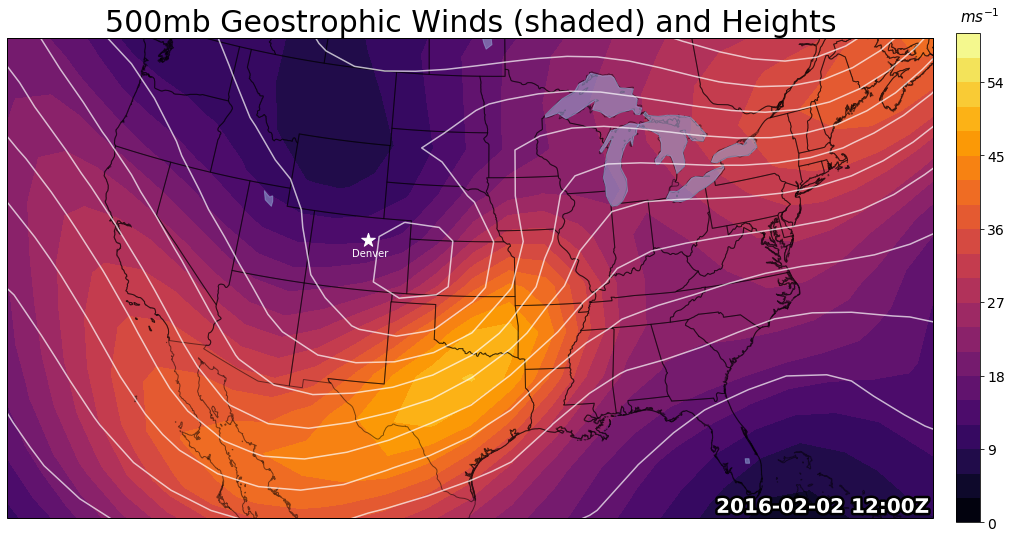

In [62]:
WindsMap(130,Winds_130_500mb,hgt130_500mb)

## Same for the vorticity: <i>input day index number</i> with associated <i>vorticity array</i> and <i>height arrays</i>

2016_02_02_1200Z


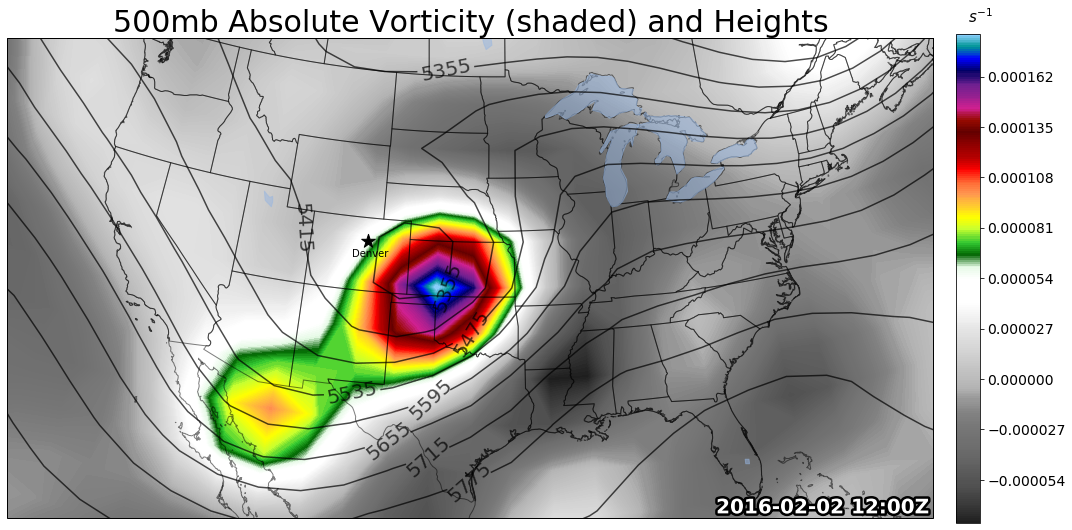

In [63]:
VortMap(130,Vort_130_500mb,hgt130_500mb)
# This will print off the timestep so we can verify it's plotting the correct time

# ETA Analysis 500mb Vorticity:
<img src="http://www2.mmm.ucar.edu/imagearchive1/ETA500mbAnalysis/vorticity/20160202/eta500_vrt_2016020208.gif" height="600" width="600">